In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf


In [4]:
yf.pdr_override()
tickers = ['AAPL']
start = '2015-01-01'
end = '2023-07-15'

stock_data = pdr.get_data_yahoo('AAPL', start, end)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498682,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810760,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144638,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000


In [5]:
stock_data.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.355652,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,187.826370,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.514084,60750200
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.283035,41342300
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.432846,41573900


In [6]:
stock_data = stock_data.reset_index()

In [7]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498682,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810760,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144638,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000


In [8]:
stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)

In [9]:
stock_data.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


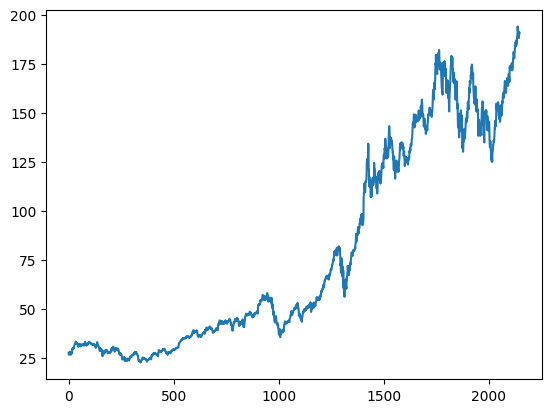

In [11]:
plt.plot(stock_data.Close)

In [12]:
ma100 = stock_data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2142    168.2622
2143    168.6110
2144    168.9554
2145    169.3237
2146    169.7051
Name: Close, Length: 2147, dtype: float64

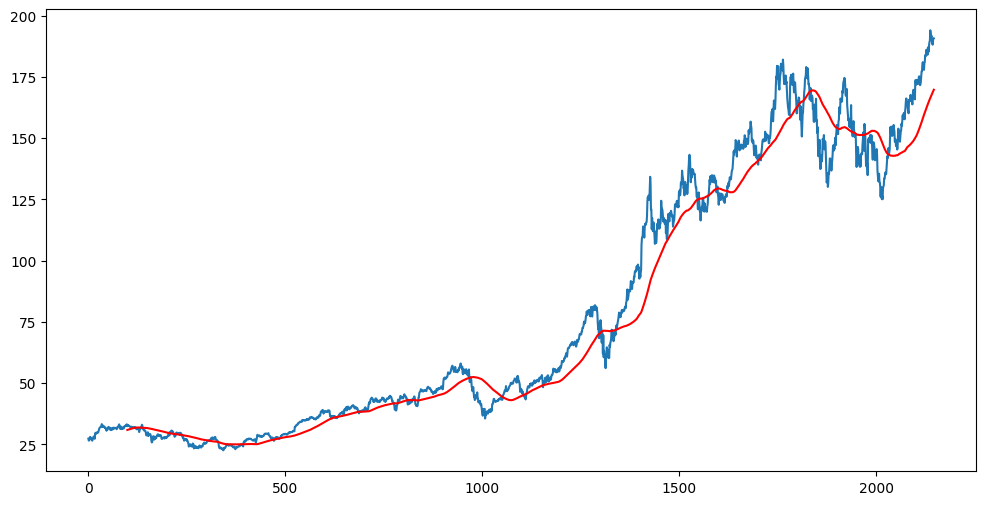

In [13]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')

In [14]:
ma200 = stock_data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2142    155.49960
2143    155.67140
2144    155.85655
2145    156.05710
2146    156.25670
Name: Close, Length: 2147, dtype: float64

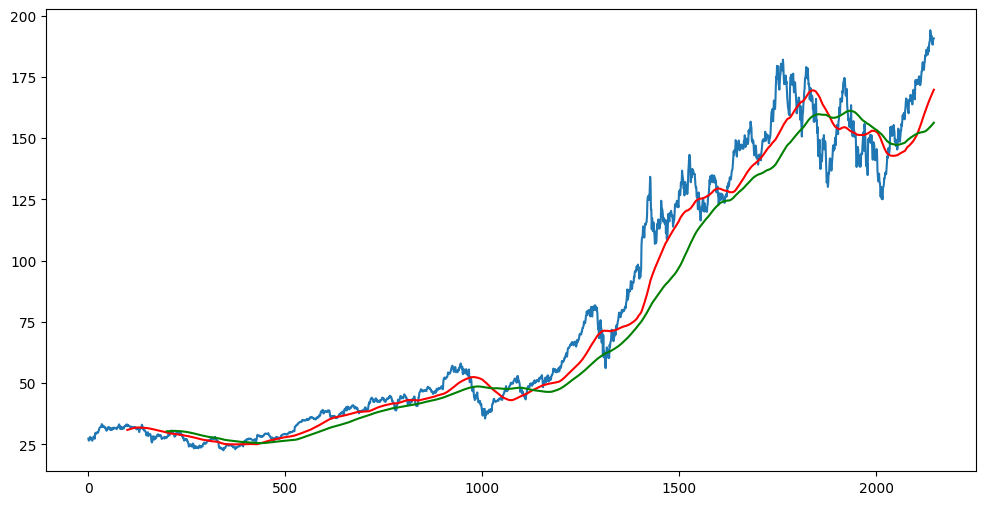

In [15]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
stock_data.shape

(2147, 5)

In [17]:
#Splitting data into Training and Testing

#Creating Dataframe for Training and Testing
data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70):int(len(stock_data))])

print(data_training.shape)
print(data_testing.shape)


(1502, 1)
(645, 1)


In [18]:
data_training.head()


,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [21]:
data_testing.head()

,Close
1502,126.660004
1503,128.229996
1504,131.880005
1505,130.960007
1506,131.970001


In [22]:
#Scaling the Data from 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [23]:
data_training_array = scaler.fit_transform(data_training)

In [24]:
data_training_array

array([[0.04254224],
       [0.03564229],
       [0.0356647 ],
       ...,
       [0.9435459 ],
       [0.94291863],
       [0.95089389]])

In [28]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train

[array([[0.04254224],
        [0.03564229],
        [0.0356647 ],
        [0.03900265],
        [0.04827726],
        [0.0485461 ],
        [0.04236302],
        [0.04453606],
        [0.04359516],
        [0.03691923],
        [0.03505982],
        [0.04117569],
        [0.0430351 ],
        [0.04941979],
        [0.05071914],
        [0.05098796],
        [0.04211659],
        [0.05593889],
        [0.06398138],
        [0.06008336],
        [0.0633765 ],
        [0.06342132],
        [0.06545993],
        [0.06631123],
        [0.06404858],
        [0.06581838],
        [0.07097093],
        [0.07737803],
        [0.08091761],
        [0.08230657],
        [0.08398675],
        [0.08598057],
        [0.0853757 ],
        [0.08772796],
        [0.09556881],
        [0.09370941],
        [0.08613737],
        [0.08978898],
        [0.08539812],
        [0.08680945],
        [0.08741433],
        [0.08557731],
        [0.08080561],
        [0.08123125],
        [0.08244098],
        [0

In [29]:
x_train, y_train = np.asarray(x_train, np.float32), np.asarray(y_train, np.float32)

In [30]:
#ML Model
import tensorflow as tf
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential



In [36]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

#Connect all these layers using the Dense Layer
model.add(Dense(units=1))


In [35]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
44/44 [==============================] - 17s 207ms/step - loss: 0.0285
Epoch 2/50
44/44 [==============================] - 9s 214ms/step - loss: 0.0062
Epoch 3/50
44/44 [==============================] - 9s 215ms/step - loss: 0.0046
Epoch 4/50
44/44 [==============================] - 9s 214ms/step - loss: 0.0041
Epoch 5/50
44/44 [==============================] - 9s 214ms/step - loss: 0.0042
Epoch 6/50
44/44 [==============================] - 9s 202ms/step - loss: 0.0041
Epoch 7/50
44/44 [==============================] - 9s 203ms/step - loss: 0.0048
Epoch 8/50
44/44 [==============================] - 9s 201ms/step - loss: 0.0037
Epoch 9/50
44/44 [==============================] - 9s 202ms/step - loss: 0.0030
Epoch 10/50
44/44 [==============================] - 9s 206ms/step - loss: 0.0034
Epoch 11/50
44/44 [==============================] - 8s 179ms/step - loss: 0.0037
Epoch 12/50
44/44 [==============================] - 8s 171ms/step - loss: 0.0034
Epoch 13/50
44/44 [=====

In [38]:
#Saving the Model
model.save('keras_model.h5')

In [39]:
data_testing.head()

,Close
1502,126.660004
1503,128.229996
1504,131.880005
1505,130.960007
1506,131.970001


In [40]:
#Create the data testing set
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

C:\Users\Shishir sharma\AppData\Local\Temp\ipykernel_5776\95764710.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
0,95.040001
1,96.190002
2,106.260002
3,108.937500
4,109.665001


In [41]:
#Transform the data into 0 to 1
input_data = scaler.fit_transform(final_df)
input_data


array([[0.        ],
       [0.0116244 ],
       [0.11341354],
       [0.14047811],
       [0.1478318 ],
       [0.15184978],
       [0.19066507],
       [0.16246338],
       [0.17878803],
       [0.14490042],
       [0.1816436 ],
       [0.20185991],
       [0.20082382],
       [0.19779134],
       [0.20744465],
       [0.2089103 ],
       [0.23486304],
       [0.29647227],
       [0.31150811],
       [0.30107142],
       [0.31823004],
       [0.30294149],
       [0.30089459],
       [0.34367727],
       [0.39563319],
       [0.36753253],
       [0.26119475],
       [0.26200342],
       [0.17972302],
       [0.22520973],
       [0.18649547],
       [0.17143434],
       [0.20539775],
       [0.20721722],
       [0.17274837],
       [0.15465476],
       [0.11927621],
       [0.15202669],
       [0.16951376],
       [0.12210656],
       [0.13322552],
       [0.17426461],
       [0.20135447],
       [0.19256035],
       [0.20994639],
       [0.21985242],
       [0.18174462],
       [0.216

In [42]:
input_data.shape


(745, 1)

In [43]:
#Define xTest and yTest
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [44]:
#Convert into array
x_test, y_test = np.asarray(x_test), np.asarray(y_test)


In [45]:
print(x_test.shape)
print(y_test.shape)


(645, 100, 1)
(645,)


In [46]:
#Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

21/21 [==============================] - 2s 61ms/step


(645, 1)

In [47]:
y_predicted


array([[0.28154874],
       [0.2881143 ],
       [0.2950943 ],
       [0.30282634],
       [0.31135318],
       [0.32055473],
       [0.33068028],
       [0.34172672],
       [0.35328257],
       [0.3645771 ],
       [0.3740886 ],
       [0.38073957],
       [0.3830064 ],
       [0.38132536],
       [0.37713692],
       [0.37136963],
       [0.3647582 ],
       [0.3583096 ],
       [0.35248834],
       [0.3471836 ],
       [0.3423362 ],
       [0.33871126],
       [0.33786651],
       [0.34049016],
       [0.34713924],
       [0.35801584],
       [0.37268406],
       [0.38947052],
       [0.4055615 ],
       [0.41888797],
       [0.4279176 ],
       [0.43219918],
       [0.43286383],
       [0.43128526],
       [0.42874265],
       [0.4260252 ],
       [0.42347524],
       [0.42118147],
       [0.41920465],
       [0.41713876],
       [0.41418296],
       [0.40948614],
       [0.4027784 ],
       [0.39369738],
       [0.3821969 ],
       [0.36885825],
       [0.35401276],
       [0.338

In [48]:
#Scaling up the values
scaler.scale_


array([0.01010816])

In [49]:
scaler_factor = 1/0.00682769

In [50]:
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

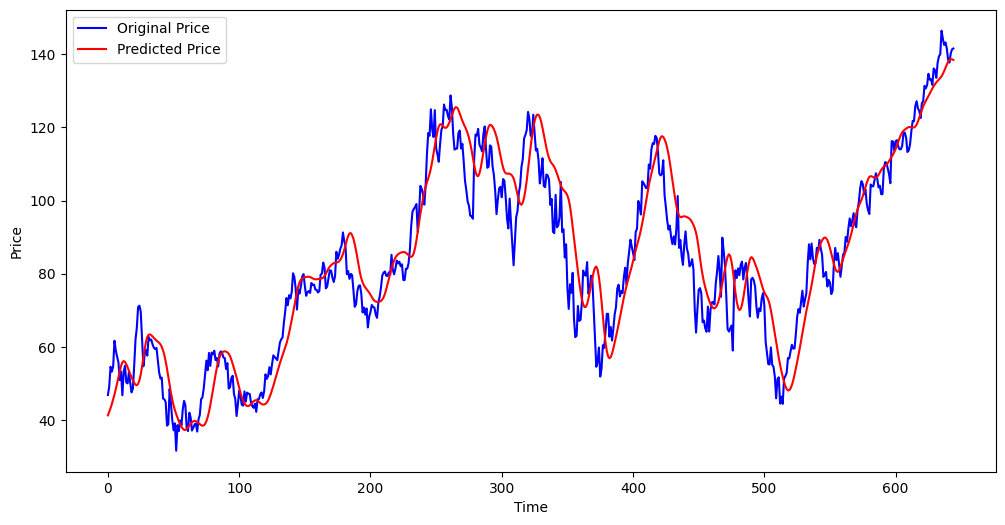

In [51]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
y_predicted.shape

(645, 1)